In [26]:
import json
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import importlib as imp
from statsmodels.tsa.statespace.varmax import VARMAX
from tqdm.notebook import tqdm as tqdmn

import matplotlib.dates as pltd

import prediction_aux as aux

In [55]:
import warnings
warnings.filterwarnings("ignore")

# Prediction model test

In [30]:
imp.reload(aux)

## Input data ##
apartment_id = 0
appliance = 'Hydractiva_shower'
time_interval = 'day'

## Plot ##
time_series = aux.get_time_series(apartment_id,
                                  appliance, time_interval)

In [31]:
time_series

([85.681824,
  221.92053800000002,
  77.724333,
  26.59614,
  212.36420600000002,
  67.978982,
  149.905728,
  72.19075000000001,
  99.425696,
  61.156864999999996,
  122.396281,
  148.723854,
  40.234104,
  51.788174,
  153.945094,
  71.086865,
  79.626648,
  109.313092,
  43.85034,
  49.05233,
  81.953715,
  149.580012,
  62.970243,
  72.868273,
  99.645738,
  104.579805,
  52.199075,
  77.313133,
  15.071866,
  62.14837300000001,
  75.16232600000001,
  72.306498,
  104.8138406,
  101.05655300000001,
  65.107163,
  88.77661,
  97.43314,
  8.570151,
  83.719741,
  159.272529,
  8.717906,
  30.191904,
  27.14737,
  70.03209,
  30.975822,
  100.51817600000001,
  25.654327,
  20.0696764,
  58.870128,
  52.20508],
 [38.069061500000004,
  36.511875999999994,
  37.9973615,
  35.030144,
  37.441478599999996,
  37.06214466666666,
  37.722445199999996,
  39.284414999999996,
  37.90856366666667,
  37.0251405,
  37.9416706,
  38.44872,
  38.880703,
  38.726982,
  38.6698558,
  38.713044,
  36.66

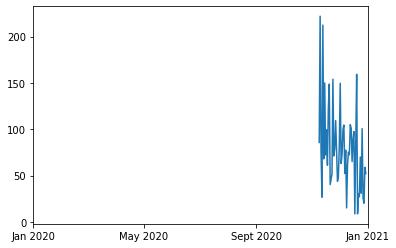

In [41]:
imp.reload(aux)

aux.plot_time_series(time_series[4], time_series[0])

In [33]:
p = 7
q = 7

time_series_array = list(zip(time_series[0], time_series[1]))

# fit model
model = VARMAX(time_series_array, order=(p,q))
model_fit = model.fit(disp=False)

/Users/alvarogomezinesta/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/Users/alvarogomezinesta/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [184]:
# make prediction
yhat = model_fit.forecast(7)
print(yhat)

[[42.69351728 38.33127356]
 [78.58235784 38.68814464]
 [85.56863203 36.93276331]
 [49.89660203 38.52442063]
 [75.51598756 37.80338524]
 [80.47143673 37.34279776]
 [65.29382821 38.29956737]]


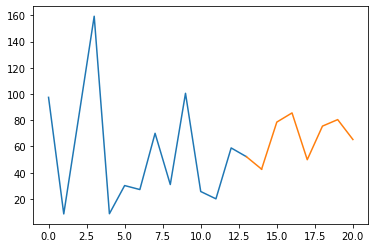

In [186]:
z = 14 # Past days to plot

plt.plot(np.arange(z),time_series[0][-z:])
plt.plot([z-1,z],[time_series[0][-1],yhat[0,0]],color='tab:orange')
plt.plot(np.arange(z,z+7),yhat[:,0],color='tab:orange')

# Generate json with data and predictions

In [59]:
imp.reload(aux)

appliances = ['Hydractiva_shower',
              'Kitchen_optima_faucet',
              'Washing_machine']
quantities = ['consumption',
              'temperature',
              'flowtime',
              'power',
              'time']

# Generate dictionary
apartments = {}
for i in tqdmn(range(20), 'Apartment'): # Apartment ID
    apartments[i] = {}
    for a in tqdmn(appliances, '--> Appliance', leave=False):
        apartments[i][a] = {}
        time_series = aux.get_time_series(i,a,'day',50)
        try:
            predictions = aux.make_predictions(time_series,7)
            pred_ok = True
        except:
            print('Apt %d, %s - predictions skipped'%(i,a))
            pred_ok = False
        for j in range(len(quantities)-1):
            apartments[i][a][quantities[j]] = time_series[j]
            if quantities[j] == 'consumption' and pred_ok:
                apartments[i][a]['consumption_predict'] = predictions[0]
            elif quantities[j] == 'flowtime' and pred_ok:
                apartments[i][a]['flowtime_predict'] = predictions[1]
            elif quantities[j] == 'power' and pred_ok:
                apartments[i][a]['power_predict'] = predictions[2]
        apartments[i][a]['time'] = time_series[-1]

Apartment:   0%|          | 0/20 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

In [72]:
# np.arrays to lists, to make it jsonizable
for i in tqdmn(range(20), 'Apartment', leave=False): # Apartment ID
    for a in tqdmn(appliances, '--> Appliance', leave=False):
        apartments[i][a]['consumption_predict'] = list(apartments[i][a]['consumption_predict'])
        apartments[i][a]['flowtime_predict'] = list(apartments[i][a]['flowtime_predict'])
        apartments[i][a]['power_predict'] = list(apartments[i][a]['power_predict'])

Apartment:   0%|          | 0/20 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

--> Appliance:   0%|          | 0/3 [00:00<?, ?it/s]

In [73]:
with open('db_processed.json', 'w') as json_file:
    json.dump(apartments, json_file)